        Data Science: A Programming Approach
        Mahyar S Vaghefi
        University of Texas Arlington
        
        This document can only be used for class studies. 
        You are not allowed to share it in any public platform.

<h1 align='center' style="color: blue;">Individual Project - Fall 2020</h1>

### Kajal Jain
### Individual Project 01
### Student Id- 1001815317

You need to work on a popular Fashion MNIST dataset for this project. The dataset includes tiny images of fashion pieces. The objective is to create a set of supervised learning models that can predict the type of item based on its image. You can use all different models that you learned about them in this course for yourr work. Keep in mind that this is a project, not a class assignmnet. So, not all steps are predetermined and you have more flexibility, and the final outcome is likely to be more detailed.

In order to load the dataset you need to have `tensorflow V2` on your computer. Use the following code to install the package

### Notes:

### All outputs are displayed below.
#### I have taken multiple images after each model, to check the prediction power of every model created, and Task 2 is done separately. 
 

In [1]:
# !pip install --upgrade tensorflow

##### For this project I have used 5 Supervised Learning Algorithm.
##### 1) Logistic Regression
##### 2) Decision Tree
##### 3) Random Forest
##### 4) K-nearest Neighbor
##### 5) SVM 

You can also check the version of it using the following code.

In [2]:
import tensorflow as tf
tf.__version__

'2.3.1'

In [3]:
#importing required libraries
import matplotlib.pyplot as plt
import numpy as np
import random

Now, it's time to load the dataset

#### Used PCA for Feature extraction and calculated number of maximum features required to capture variations in dependent variables. 

In [4]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#### As can be seen from the above code, the dataset was divided into train and test sets. Let's take a look at the X_train
## Step1:

In [5]:
print("Shape of x_train: {}".format(X_train.shape))   #shape of training dataset
print("Shape of y_train: {}".format(y_train.shape))
print(".................................")
print("Shape of x_test: {}".format(X_test.shape))
print("Shape of y_test: {}".format(y_test.shape))    #shape of test dataset

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
.................................
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


#### As it is clear, the train dataset (`X_train`) contains 60,000 images of size 28 x 28. We can visualize one of the images using the following code:

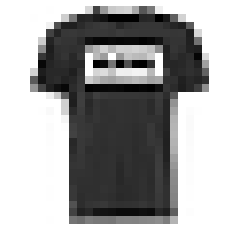

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sample_image = X_train[1]
plt.imshow(sample_image, cmap='binary')
plt.axis('off')
plt.show()   #plotting one image from training dataset below. 

The `y_train` also includes values between 0 and 9. Each represents a particular category. For example, we can check the value of `y_train` for the above image.

In [7]:
y_train[1]

0

The above code shows that the image belongs to category 0. To get the associated label with each category, you can use the following code:

In [8]:
#class_name of different stored images in the dataset

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_train[1]])   #describing class of above predicted image 

T-shirt/top


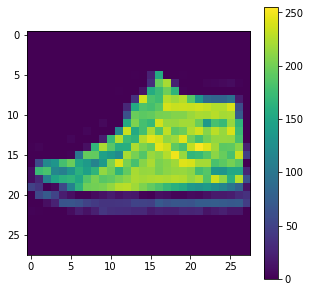

Image(1908): with label number '7', has class_name as 'Sneaker'.


In [9]:
#lets visualize one more image and print its Class_name
sample = 1908                                                        #taking any random sample.
each = X_train[sample]

plt.figure(figsize=(5,5))
plt.imshow(each)
plt.colorbar()
plt.show()
print("Image({}): with label number '{}', has class_name as '{}'.".format(sample,y_train[sample], class_names[y_train[sample]]))

#### Visualizing images from dataset in matrix format.
## Step 2:

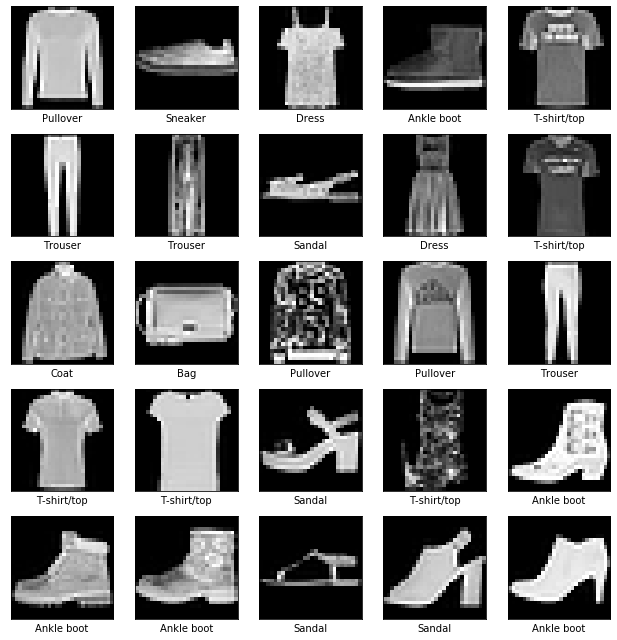

In [10]:
Row = 5
Column = 5
plt.figure(figsize=(9,9)) 
for i in range(Row * Column):
    image_array = random.randint(0, len(X_train)+1)
    image = X_train[image_array] 
    plt.subplot(Row, Column, i+1)       
    plt.imshow(image, cmap='gray')  
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[y_train[image_array]])
    plt.tight_layout()   
    
plt.show()

## Step 3:

In [11]:
#Normalizing the dataset and reshaping the array.


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
X_train.shape

(60000, 28, 28)

In [12]:

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [13]:
from sklearn import metrics
def plot_confusion_matrix(cm, names, title='Confusion matrix is:', cmap=plt.cm.Purples):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True labels are:')
    plt.xlabel('Predicted labels are:')

## Step 4:

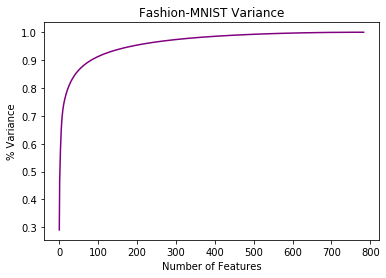

In [14]:
#Using PCA for dimension reduction
#Plotting curve to find how many number of features are required for capturing maximum variance

from sklearn.decomposition import PCA
pca = PCA().fit(X_train)
# Plot the cumulative sum of eigenvalues
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='purple')
plt.xlabel('Number of Features')
plt.ylabel('% Variance') #for each component
plt.title('Fashion-MNIST Variance')
plt.show()


In [15]:
#As shown above, in the graph that after around 350 feature, variance is constant.
#so we will have 350 feature to explain the changes in dependent variables.
pca = PCA(n_components=350)



## Step 5:

In [16]:
#Reshaping and displaying shape

pca.fit(X_train)
#pca.transform(X_train)
X_train_pca=pca.transform(X_train)

X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(60000, 350)
(10000, 350)


#### Building models (Supervised Learning Models)
##### 1. Logistic Regression
##### 2. Decision Tree.
##### 3. Random Forest
##### 4. KNN Algorithm
##### 5. SVM

## Step 6:

In [17]:
#importing required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score 
from sklearn.model_selection import StratifiedKFold


### Model 1- Logistic Regression.
#### 1.My first model is simple logistic regression with cross validation, calculating confusion matrix and classification report for the same. 
#### 2.Also, Calculated- mean precision, mean recall and mean f-1 score for the model.
#### 3.Finally picked some random images for visualization, for finding if model is able to predict the correct class names for the images. (Just for accuracy purpose)


In [18]:
## Logistic Regression.
logreg_model = LogisticRegression(solver='liblinear')
accuracy_logreg = cross_val_score(logreg_model, X_train_pca, y_train, cv=5, scoring='accuracy')
print("Cross Validation Scores for Log Reg: {}".format(accuracy_logreg))
print("Mean Accuracy Score for Log Reg: {}".format(np.mean(accuracy_logreg)))
print()

Cross Validation Scores for Log Reg: [0.85583333 0.84866667 0.85716667 0.85675    0.85325   ]
Mean Accuracy Score for Log Reg: 0.8543333333333333



In [19]:
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

scoring = {'precision': make_scorer(precision_score, average='micro'), 
        
           'recall': make_scorer(recall_score, average='micro'),
           
           'f1':make_scorer(f1_score, average='weighted')}
scores = cross_validate(logreg_model,  X_train_pca, y_train, scoring=scoring, cv=cv,return_train_score=False)
print(scores)

{'fit_time': array([205.52893066, 217.66085148, 218.78100038, 210.99419188,
       219.16696024]), 'score_time': array([0.07011366, 0.08330607, 0.07781625, 0.088588  , 0.08344579]), 'test_precision': array([0.853     , 0.853     , 0.8575    , 0.85658333, 0.84975   ]), 'test_recall': array([0.853     , 0.853     , 0.8575    , 0.85658333, 0.84975   ]), 'test_f1': array([0.85164939, 0.85102029, 0.85584612, 0.85558175, 0.84846237])}


In [20]:
#calculating Mean scores:

print("Mean Precision Score for Log Reg: {}".format(np.mean(scores['test_precision'])))
print("Mean Recall Score for Log Reg: {}".format(np.mean(scores['test_recall'])))
print("Mean F-1 Score for Log Reg: {}".format(np.mean(scores['test_f1'])))

Mean Precision Score for Log Reg: 0.8539666666666668
Mean Recall Score for Log Reg: 0.8539666666666668
Mean F-1 Score for Log Reg: 0.8525119870348916


In [21]:
logreg_model.fit(X_train_pca, y_train)

LogisticRegression(solver='liblinear')

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
y_test_hat = logreg_model.predict(X_test_pca)
log_cm_pca = metrics.confusion_matrix(y_test,y_test_hat)                                          #confusion matrix
print("-----------------Logistic Regression Report-Feature Reduction--------------")
print("\n")
print("Confusion matrix is: \n", log_cm_pca)
print("\n")

print(metrics.classification_report(y_test, y_test_hat))         #presenting classification report

-----------------Logistic Regression Report-Feature Reduction--------------


Confusion matrix is: 
 [[821   4  16  47   6   3  87   1  15   0]
 [  4 957   3  26   5   0   2   1   2   0]
 [ 23   4 730  10 140   0  74   2  16   1]
 [ 24  15  15 873  33   0  35   0   5   0]
 [  0   1 105  41 765   1  77   0  10   0]
 [  1   0   0   1   0 916   0  53   8  21]
 [148   3 130  47 107   0 531   0  33   1]
 [  0   0   0   0   0  33   0 933   0  34]
 [  8   1   6  11   2   7  16   5 944   0]
 [  0   0   0   0   0  13   0  43   1 943]]


              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1000
           1       0.97      0.96      0.96      1000
           2       0.73      0.73      0.73      1000
           3       0.83      0.87      0.85      1000
           4       0.72      0.77      0.74      1000
           5       0.94      0.92      0.93      1000
           6       0.65      0.53      0.58      1000
           7       0.90      0.93

 #### Finding AUC score for Logistic Regression

In [23]:
#AUC score for Logistic Regression.

from sklearn.metrics import roc_auc_score
log_auc=roc_auc_score(y_test,logreg_model.predict_proba(X_test_pca), multi_class="ovr", average="macro")
print("Auc score is:{:.3f}".format(log_auc),'\n')

Auc score is:0.981 



#### Interpretation:
##### 1. My logistic regression model has mean accuracy of  85%.
##### 2. F-1 score is highest for class_lables 01. 
##### 3. AUC score is:


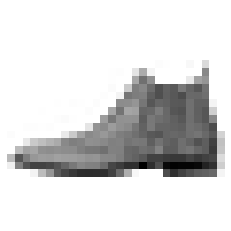

The Predicted class name of the above projected image is: Ankle boot


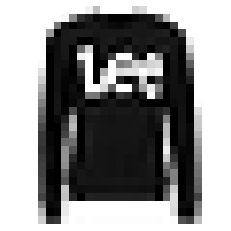

The Predicted class name of the above projected image is: Pullover


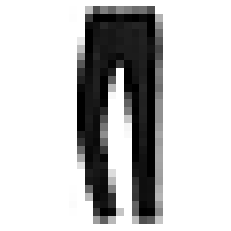

The Predicted class name of the above projected image is: Trouser


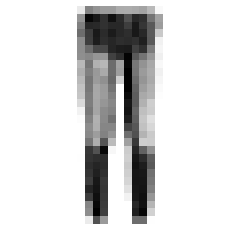

The Predicted class name of the above projected image is: Trouser


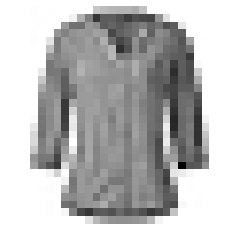

The Predicted class name of the above projected image is: Shirt


In [24]:
#visualization for existing test dataset.

i=0
for i in range(5):     #5 Images
    a1=X_test[i]
    a_d1=a1.reshape(28,28)
    plt.imshow(a_d1,cmap='binary')
    plt.axis('off')
    plt.show()
    ypred1=y_test_hat[i]                                         #predicted value
    print("The Predicted class name of the above projected image is:", class_names[ypred1])  #class of predicted value as shown above
    i=i+1

## Model 2- DECISION TREE

#### 1. I am using Decision Tree as my supervised Learning model here, and displaying Accuracy, F-1 score, Precision, Recall, Confusion Matrix and Classification Report for the same. 
#### 2.For finding the max depth of my decision tree, I am using grid search. 
#### 3.Displayed Roc curve and Calculated AUC for each class. [0-9] in our case. 
#### 4. Finally, taking multiple random images, (around 6) for visualizing my results and checking if the correct class is predicted for the displayed image. (optional) 

In [82]:
#Using grid-search for finding best parameter and starification with 5 folds for Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
DT = DecisionTreeClassifier()


param_grid = {'max_depth': [10,20,30,40,50]}   #between 10-50
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(DT, param_grid, cv = cv, scoring = 'accuracy')
grid.fit(X_train_pca, y_train)
print("The best Parameter is: {}".format(grid.best_params_))

The best Parameter is: {'max_depth': 20}


In [ ]:
# As we can see tha best parameter for my decision tree is 20. 

In [25]:
## 1st model= Decision Tree:
Tree1 = DecisionTreeClassifier(max_depth=20, criterion='gini')   #gini index is an important criterion for checking purity of decision tree.
Tree1.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=20)

In [26]:
#fitting the model above. 

-----------------Decision Tree Report-Feature Reduction--------------


F1 score is: 0.7639533298920022


Accuracy score is: 0.7641


Confusion matrix is: 
 [[715   6  34  60  18   4 140   1  21   1]
 [ 10 936   7  30   8   0   7   0   2   0]
 [ 27   4 658  17 150   3 126   0  14   1]
 [ 53  30  20 776  63   1  50   0   7   0]
 [ 17   3 161  44 635   0 125   0  14   1]
 [  5   0   1   2   2 827   5  81  17  60]
 [162  10 127  51 126   5 478   1  38   2]
 [  1   0   1   0   0  82   4 851   5  56]
 [ 10   3  19   6  14  20  29  14 884   1]
 [  0   0   2   0   0  36   3  77   1 881]]


Plotting confusion matrix below:




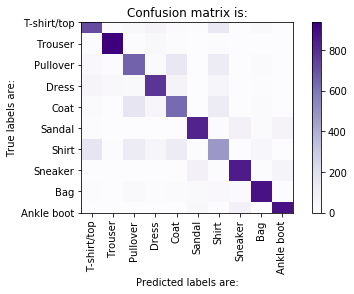



              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1000
           1       0.94      0.94      0.94      1000
           2       0.64      0.66      0.65      1000
           3       0.79      0.78      0.78      1000
           4       0.62      0.64      0.63      1000
           5       0.85      0.83      0.84      1000
           6       0.49      0.48      0.49      1000
           7       0.83      0.85      0.84      1000
           8       0.88      0.88      0.88      1000
           9       0.88      0.88      0.88      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



In [27]:
#Predicting Values:
y_pred_tree_pca= Tree1.predict(X_test_pca)
Tree_f1_pca = metrics.f1_score(y_test, y_pred_tree_pca, average= "weighted")    #F-1 Score
Tree_accuracy_pca = metrics.accuracy_score(y_test, y_pred_tree_pca)             #accuracy score
Tree_cm_pca = metrics.confusion_matrix(y_test, y_pred_tree_pca)                 #confusion matrix
print("-----------------Decision Tree Report-Feature Reduction--------------")
print("\n")
print("F1 score is: {}".format(Tree_f1_pca))
print("\n")
print("Accuracy score is: {}".format(Tree_accuracy_pca))
print("\n")
print("Confusion matrix is: \n", Tree_cm_pca)
print("\n")
print('Plotting confusion matrix below:')
print("\n")
plt.figure()
plot_confusion_matrix(Tree_cm_pca, class_names)
plt.show()
print("\n")
print(metrics.classification_report(y_test, y_pred_tree_pca))


In [28]:
from sklearn.model_selection import cross_val_score                #accuracy using cross validation.
a=cross_val_score(Tree1, X_train, y_train, cv=3, scoring="accuracy")
print("Mean Accuracy Score for Decision Tree: {}".format(np.mean(a)))
print()

Mean Accuracy Score for Decision Tree: 0.7956166666666666



#### Note: Measuring accuracy of above model using Cross Val score.
#### Cross validation is a popular technique to measure the accuracy of the model. 
#### In case of Decision tree it is not that good, as can be seen from above values. 

In [29]:
y_score = Tree1.fit(X_train_pca, y_train).predict_proba(X_test_pca)
y_score

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.00330852, 0.        , 0.96443342, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.99893978, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.99893978, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.97750511, 0.00817996,
        0.00613497]])

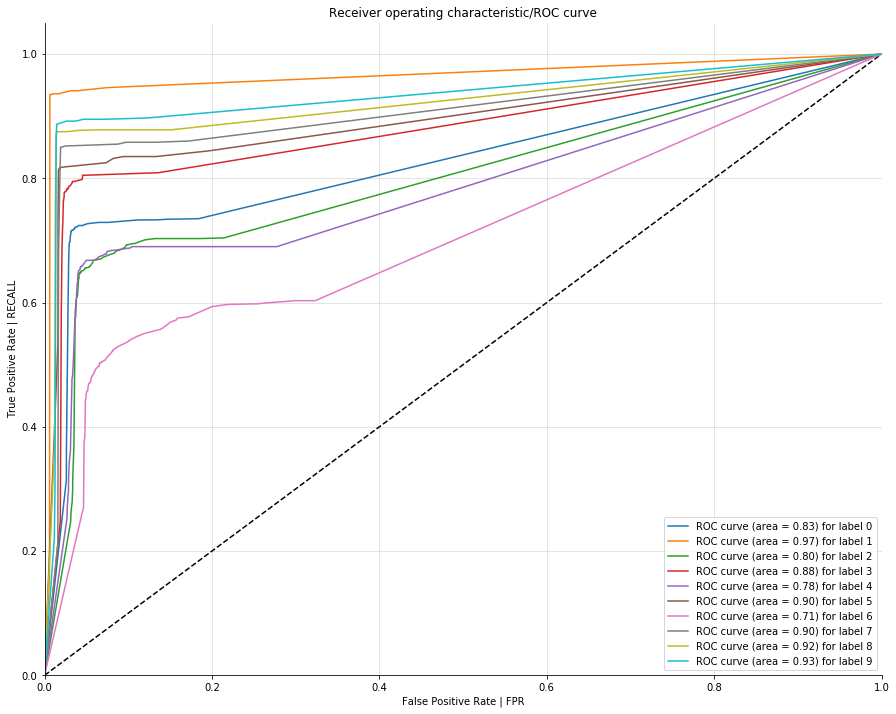

None


In [30]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import seaborn as sns
import pandas as pd
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

def plot_multiclass_roc(clf, X_test_pca, y_test, classes, figsize=(15, 5)):
    y_score = Tree1.fit(X_train_pca, y_train).predict_proba(X_test_pca)
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate | FPR')
    ax.set_ylabel('True Positive Rate | RECALL')
    ax.set_title('Receiver operating characteristic/ROC curve')
    for i in range(classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

c=plot_multiclass_roc(Pipeline, X_test_pca, y_test, classes=10, figsize=(15, 12))
print(c)

#### As, can be seen from above result, interpreting the following conclusion:
#### 1. From the confusion matrix and classification report
#### 1.1 Accuracy and F-1 score is close to 76%.
#### 1.2 AUC for Label 1- for, Trouser is the highest. 
#### 1.3 Though accuracy is not very good, let's take multiple images to check if, the model is able to predict correct class_label for given image. 

In [31]:
# Running some test:
print("Actual class is:",y_test[1],"and Predicted Class is:", y_pred_tree_pca[1])         #actual and predicted

Actual class is: 2 and Predicted Class is: 2


## Step 7:
### Visualization:

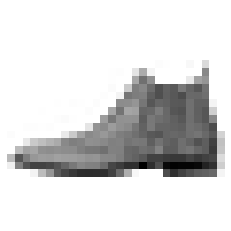

The Predicted class name of the above projected image is: Pullover


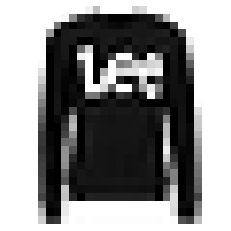

The Predicted class name of the above projected image is: Pullover


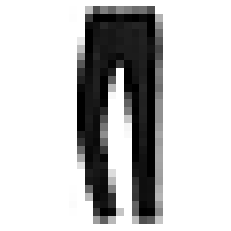

The Predicted class name of the above projected image is: Trouser


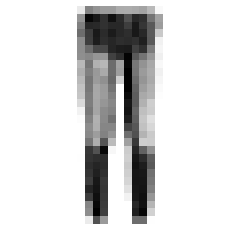

The Predicted class name of the above projected image is: Trouser


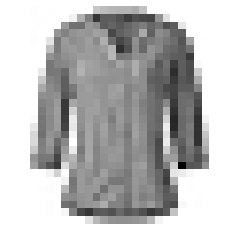

The Predicted class name of the above projected image is: Pullover


In [32]:
i=0
for i in range(5):     #5 Images
    a1=X_test[i]
    a_d1=a1.reshape(28,28)
    plt.imshow(a_d1,cmap='binary')
    plt.axis('off')
    plt.show()
    ypred1=y_pred_tree_pca[i]                                         #predicted value
    print("The Predicted class name of the above projected image is:", class_names[ypred1])  #class of predicted value as shown above
    i=i+1

### Results: 
#### Some values are correctly guessed while some are not. Let us create other model with more accuracy to increase prediction power of our model.

##  Model 3- KNN
#### 1.I am using K- Nearest Neighbor, for finding best parameter, as my supervised Learning model here, and  displaying accuracy, f-1 score, precision, recall, confusion matrix and classification report for the same.
#### 2.Displayed Roc curve and Calculated AUC for each class. [0-9] in our case.
#### 3.Finally, taking multiple random images, (around 6) for visualizing my results and checking if the correct class is predicted for the displayed image.

In [33]:
knn_m = KNeighborsClassifier(n_neighbors=5)
knn_m.fit(X_train_pca, y_train)
y_pred_knn_pca = knn_m.predict(X_test_pca)




#as calculated above, for  be the best number of neighbors to consider

-----------------K-nearest neighbors Report---------------


F1 score: 0.8583763232376361


Accuracy score: 0.859


Confusion matrix: 
 [[852   1  18  16   4   1 101   1   6   0]
 [  8 969   4  12   4   0   2   0   1   0]
 [ 23   2 811  11  86   0  66   0   1   0]
 [ 41  10  16 862  37   0  31   0   3   0]
 [  2   1 125  25 773   0  71   0   3   0]
 [  1   0   0   0   0 844   2  85   1  67]
 [167   2 129  23  76   0 592   0  11   0]
 [  0   0   0   0   0   5   0 959   0  36]
 [  2   0   8   3   8   0  13   7 958   1]
 [  0   0   0   0   0   2   1  27   0 970]]


Plotting confusion matrix


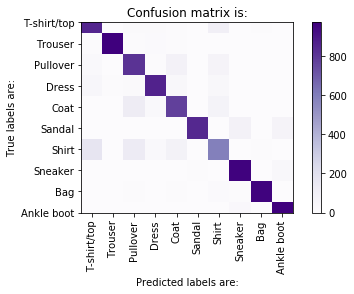

              precision    recall  f1-score   support

           0       0.78      0.85      0.81      1000
           1       0.98      0.97      0.98      1000
           2       0.73      0.81      0.77      1000
           3       0.91      0.86      0.88      1000
           4       0.78      0.77      0.78      1000
           5       0.99      0.84      0.91      1000
           6       0.67      0.59      0.63      1000
           7       0.89      0.96      0.92      1000
           8       0.97      0.96      0.97      1000
           9       0.90      0.97      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [34]:
knn_pca_f1 = metrics.f1_score(y_test, y_pred_knn_pca, average= "weighted")
knn_pca_accuracy = metrics.accuracy_score(y_test, y_pred_knn_pca)
knn_pca_cm = metrics.confusion_matrix(y_test, y_pred_knn_pca)
print("-----------------K-nearest neighbors Report---------------")
print("\n")
print("F1 score: {}".format(knn_pca_f1))
print("\n")
print("Accuracy score: {}".format(knn_pca_accuracy))
print("\n")
print("Confusion matrix: \n", knn_pca_cm)
print("\n")
print('Plotting confusion matrix')
plt.figure()
plot_confusion_matrix(knn_pca_cm, class_names)
plt.show()
print(metrics.classification_report(y_test, y_pred_knn_pca))

In [35]:
### Interpretation:

# F1 score and Accuracy score are close to 85%.

# Let's draw ROC curve and calculate AUC under each class.


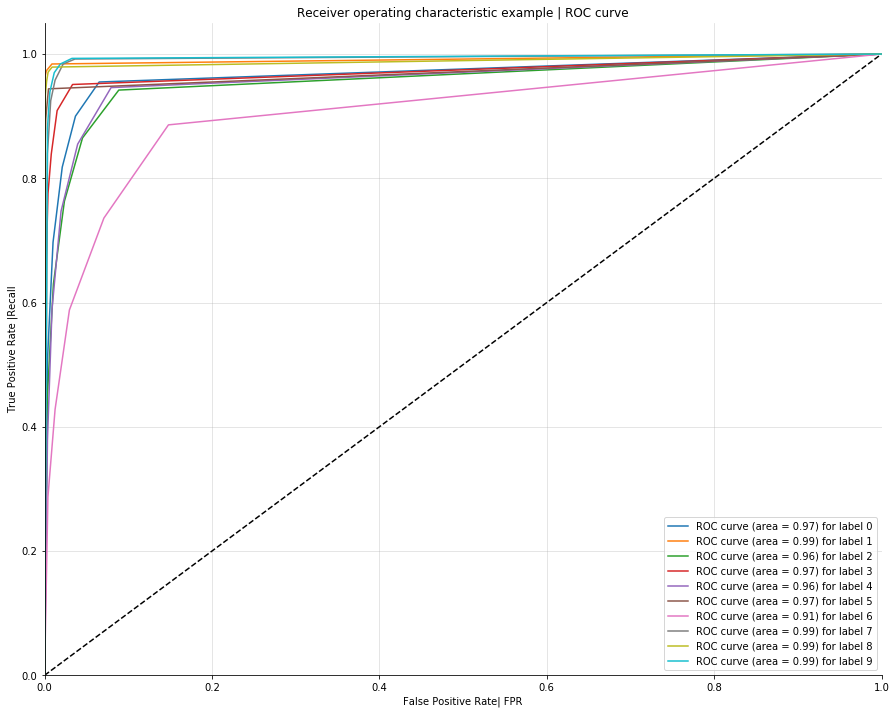

None


In [36]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.pipeline import Pipeline
def plot_multiclass_roc(clf, X_test_pca, y_test, classes, figsize=(15,5)):
    y_score = knn_m.fit(X_train_pca, y_train).predict_proba(X_test_pca)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate| FPR')
    ax.set_ylabel('True Positive Rate |Recall')
    ax.set_title('Receiver operating characteristic example | ROC curve')
    for i in range(classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

curve=plot_multiclass_roc(Pipeline, X_test_pca, y_test, classes=10, figsize=(15,12))
print(curve)

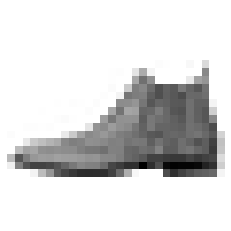

The Predicted class name of the above projected image is: Ankle boot


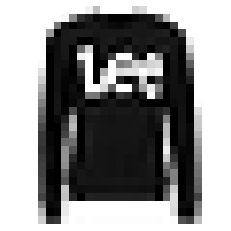

The Predicted class name of the above projected image is: Pullover


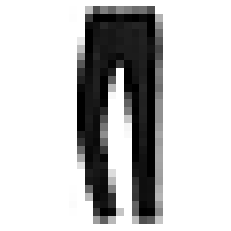

The Predicted class name of the above projected image is: Trouser


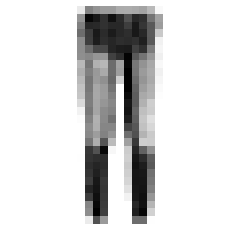

The Predicted class name of the above projected image is: Trouser


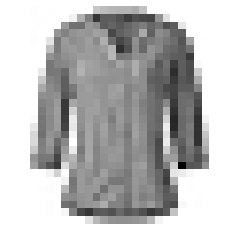

The Predicted class name of the above projected image is: Shirt


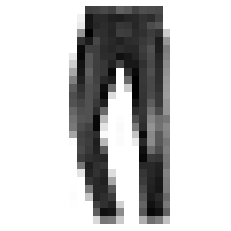

The Predicted class name of the above projected image is: Trouser


In [37]:
# Running some test, taking images to check the prediction power of the model
i=1
for i in range(6):
    a1=X_test[i]
    a_d1=a1.reshape(28,28)
    plt.imshow(a_d1,cmap='binary')
    plt.axis('off')
    plt.show()
    ypred1=y_pred_knn_pca[i]   #predicted value
    print("The Predicted class name of the above projected image is:", class_names[ypred1])  #class of predicted value as shown above
    i=i+1


##### Accuracy is more than the above created model. KNN model is able to predict correct class lables of projected image, as can be seen above.



### Model 4- Random Forest Classifier

#### 1.My 4th model is random forest classifier, using depth as 40, and calculating f-1, recall, precision score for the model. 

#### 2.Displaying Confusion matrix and classification report.

#### 3.Finally picking some random images, for visualization, checking if model is able to predict the valid result.


In [38]:
#MODEL 3: Random Forest Classifier- with PCA extracted features
random_f = RandomForestClassifier(criterion='gini', max_depth=40, n_estimators=100)  #using tree depth as 40
random_f.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=40)

-----------------Random Forest Report---------------


F1 score is: 0.8449137007619821


Accuracy score is: 0.8472


Confusion matrix is: 
 [[833   0  15  42   6   6  76   0  22   0]
 [  5 951   4  29   6   0   3   0   2   0]
 [ 14   0 790  10 113   0  61   0  12   0]
 [ 35   4  10 870  32   2  39   0   8   0]
 [  1   0 107  37 783   1  61   0  10   0]
 [  0   0   0   0   0 908   0  47   7  38]
 [178   1 124  32  97   2 531   0  35   0]
 [  0   0   0   0   0  36   0 914   2  48]
 [  3   0   4   8   5  18   7   4 949   2]
 [  0   0   0   0   0  17   0  37   3 943]]


Plotting confusion matrix




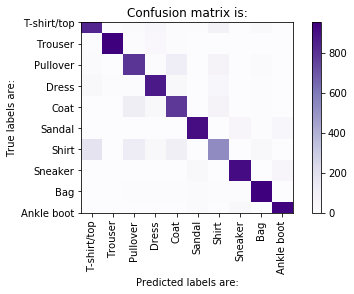

              precision    recall  f1-score   support

           0       0.78      0.83      0.81      1000
           1       0.99      0.95      0.97      1000
           2       0.75      0.79      0.77      1000
           3       0.85      0.87      0.86      1000
           4       0.75      0.78      0.77      1000
           5       0.92      0.91      0.91      1000
           6       0.68      0.53      0.60      1000
           7       0.91      0.91      0.91      1000
           8       0.90      0.95      0.93      1000
           9       0.91      0.94      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.84     10000
weighted avg       0.85      0.85      0.84     10000



In [39]:
y_pred_f_pca = random_f.predict(X_test_pca)
random_f_pca_f1 = metrics.f1_score(y_test, y_pred_f_pca, average= "weighted")
random_f_pca_accuracy = metrics.accuracy_score(y_test, y_pred_f_pca)
random_f_pca_cm = metrics.confusion_matrix(y_test, y_pred_f_pca)
print("-----------------Random Forest Report---------------")
print("\n")
print("F1 score is: {}".format(random_f_pca_f1))
print("\n")
print("Accuracy score is: {}".format(random_f_pca_accuracy))
print("\n")
print("Confusion matrix is: \n", random_f_pca_cm)
print("\n")
print('Plotting confusion matrix')
print("\n")
plt.figure()
plot_confusion_matrix(random_f_pca_cm, class_names)
plt.show()
print(metrics.classification_report(y_test, y_pred_f_pca))

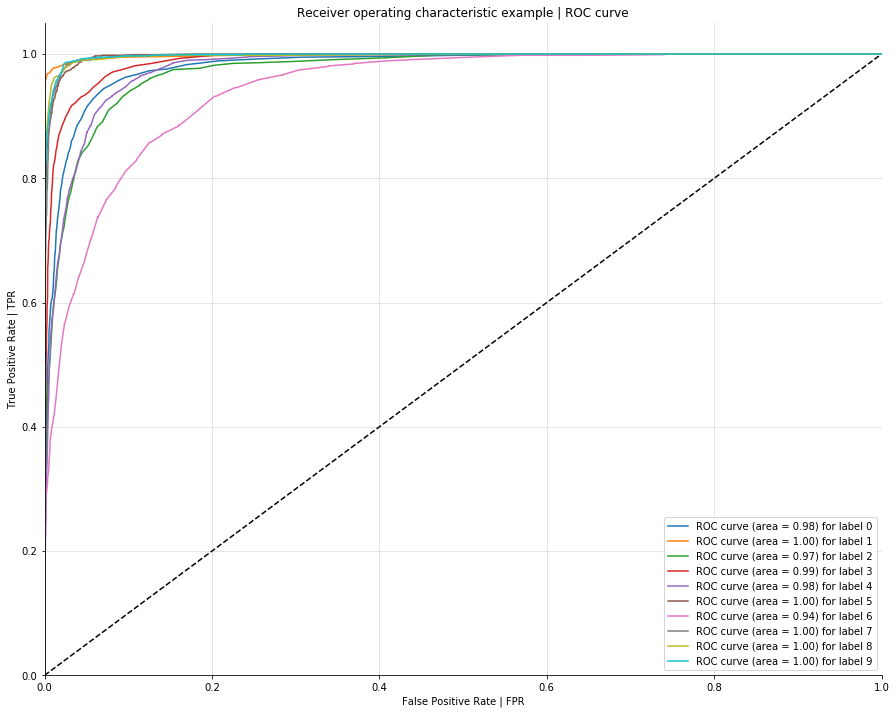

None


In [40]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.pipeline import Pipeline

def plot_multiclass_roc(clf, X_test_pca, y_test, classes, figsize=(15,5)):
    y_score = random_f.fit(X_train_pca, y_train).predict_proba(X_test_pca)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate | FPR')
    ax.set_ylabel('True Positive Rate | TPR')
    ax.set_title('Receiver operating characteristic example | ROC curve')
    for i in range(classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

curve=plot_multiclass_roc(Pipeline, X_test_pca, y_test,classes=10, figsize=(15,12))
print(curve)

In [41]:
#### Interpretation:


# F1 score is close to 0.85
# Accuracy score is: 0.85
#ploting graph between predicted and actual values:

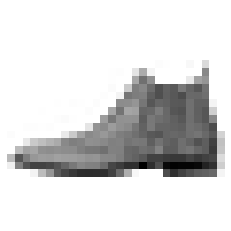

The Predicted class name of the above projected image is: Ankle boot


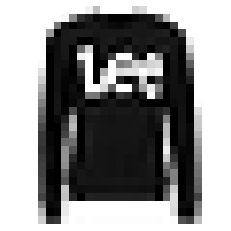

The Predicted class name of the above projected image is: Pullover


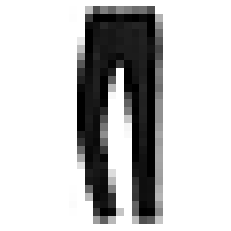

The Predicted class name of the above projected image is: Trouser


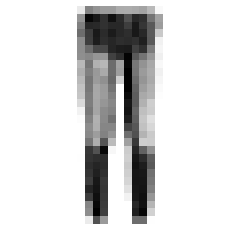

The Predicted class name of the above projected image is: Trouser


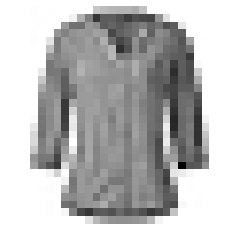

The Predicted class name of the above projected image is: Shirt


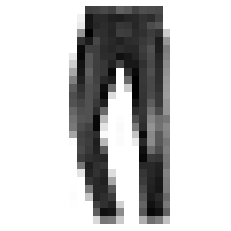

The Predicted class name of the above projected image is: Trouser


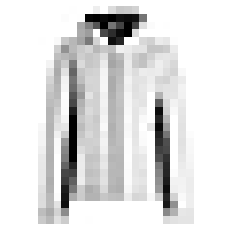

The Predicted class name of the above projected image is: Coat


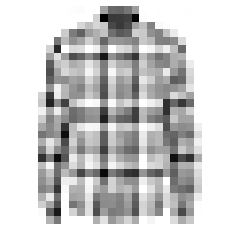

The Predicted class name of the above projected image is: Shirt


In [42]:
# Running some test, taking images to check the prediction power of the model
#visualizing and checking th eprediction for 3rd model
i=1
for i in range(8):
    a1=X_test[i]
    a_d1=a1.reshape(28,28)
    plt.imshow(a_d1,cmap='binary')
    plt.axis('off')
    plt.show()
    ypred1=y_pred_f_pca[i]   #predicted value
    print("The Predicted class name of the above projected image is:", class_names[ypred1])  #class of predicted value as shown above
    i=i+2


##### The above model is able to predict the class lables of the dataset perfectly. Accuracy is same as that of KNN. 
######  Both models can be used for prediction. 

### Model-5
### SVM
#### 1. Using SVM on PCA extracted features.
#### 2. Displaying classification report and confusion matrix for the model
#### 3. Using random images, to visualize. 

In [43]:
from sklearn.svm import SVC


In [44]:
svc = SVC(C=1, kernel='linear', gamma="auto")
svc.fit(X_train_pca, y_train)


SVC(C=1, gamma='auto', kernel='linear')

-----------------SVM Report---------------
F1 score is: 0.8483003095423189


Accuracy score is: 0.8493


Confusion matrix is: 
 [[819   6  12  46   3   1 101   0  12   0]
 [  5 962   2  25   3   0   2   0   1   0]
 [ 21   5 763   9 117   0  78   0   7   0]
 [ 42  17  13 857  28   0  37   0   6   0]
 [  1   3 115  41 761   0  76   0   3   0]
 [  1   0   0   1   0 938   0  44   1  15]
 [156   1 123  35  93   0 571   0  21   0]
 [  0   0   0   0   0  33   0 942   1  24]
 [  8   2   8   9   6  10  16   6 935   0]
 [  0   0   0   0   0  12   1  42   0 945]]


Plotting confusion matrix




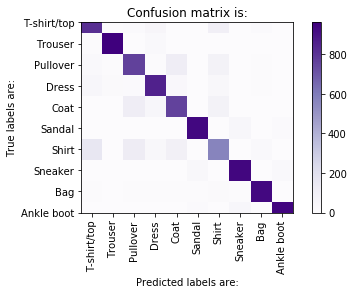

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1000
           1       0.97      0.96      0.96      1000
           2       0.74      0.76      0.75      1000
           3       0.84      0.86      0.85      1000
           4       0.75      0.76      0.76      1000
           5       0.94      0.94      0.94      1000
           6       0.65      0.57      0.61      1000
           7       0.91      0.94      0.93      1000
           8       0.95      0.94      0.94      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [45]:
y_pred_svc_pca = svc.predict(X_test_pca)

svc_pca_f1 = metrics.f1_score(y_test, y_pred_svc_pca, average= "weighted")
svc_pca_accuracy = metrics.accuracy_score(y_test, y_pred_svc_pca)
svc_pca_cm = metrics.confusion_matrix(y_test, y_pred_svc_pca)
print("-----------------SVM Report---------------")
print("F1 score is: {}".format(svc_pca_f1))
print('\n')
print("Accuracy score is: {}".format(svc_pca_accuracy))
print('\n')
print("Confusion matrix is: \n", svc_pca_cm)
print("\n")
print('Plotting confusion matrix')
print("\n")
plt.figure()
plot_confusion_matrix(svc_pca_cm, class_names)
plt.show()
print(metrics.classification_report(y_test, y_pred_svc_pca))

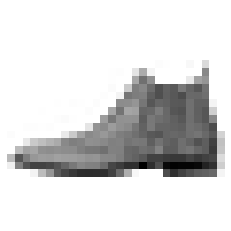

The Predicted class name of the above projected image is: Ankle boot


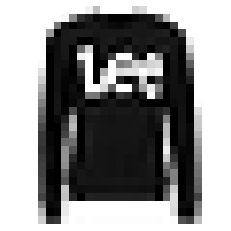

The Predicted class name of the above projected image is: Pullover


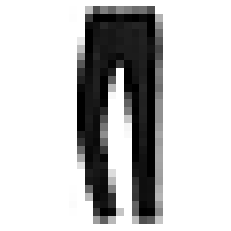

The Predicted class name of the above projected image is: Trouser


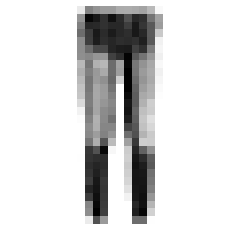

The Predicted class name of the above projected image is: Trouser


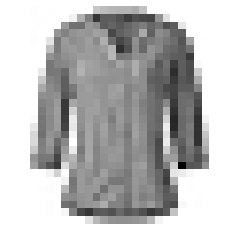

The Predicted class name of the above projected image is: Shirt


In [46]:
#Results: ACcuracy is close to 85%.
#Predicting images class labels:
i=0
for i in range(5):
    a1=X_test[i]
    a_d1=a1.reshape(28,28)
    plt.imshow(a_d1,cmap='binary')
    plt.axis('off')
    plt.show()
    ypred1=y_pred_svc_pca[i]   #predicted value
    print("The Predicted class name of the above projected image is:", class_names[ypred1])  #class of predicted value as shown above
    i=i+2

### Interpretation- Plotting graph for Accuracy of Models:


Text(0.5, 1.0, '% Accuracy of Models')

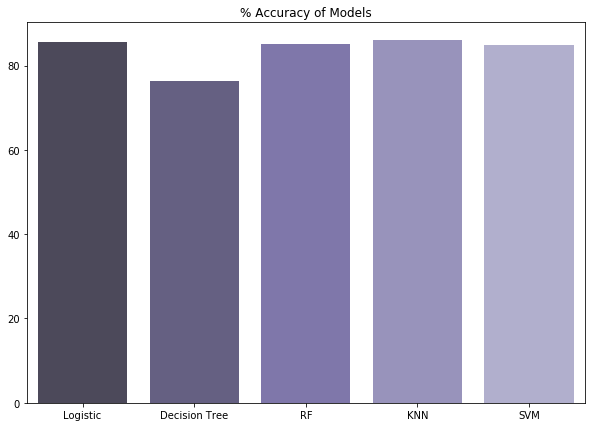

In [47]:
import seaborn as sns
Model_name=['Logistic', 'Decision Tree', 'RF', 'KNN', 'SVM']
Model_PCA_Data_Accuracy = [85.47, 76.36, 85.0, 85.96, 84.97]
fig, axes = plt.subplots(1,1,figsize=(10,7))
sns.barplot(x=Model_name,y=Model_PCA_Data_Accuracy,palette='Purples_d').set_title("% Accuracy of Models")


## Task 2:
#### Here, I am using my own Images, and trying to predict the correct class lables. 
#### Prediction of our own Images:

In [48]:
import numpy as np 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

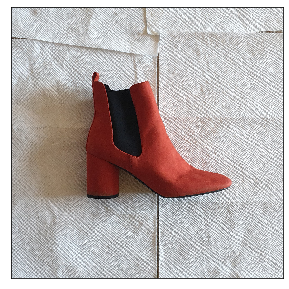

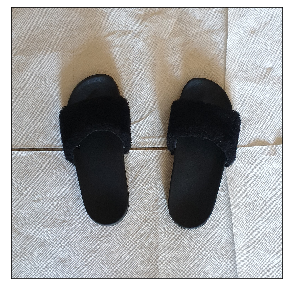

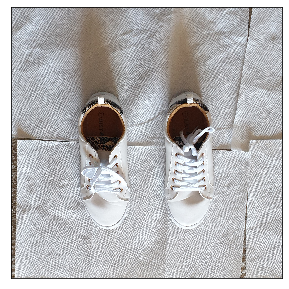

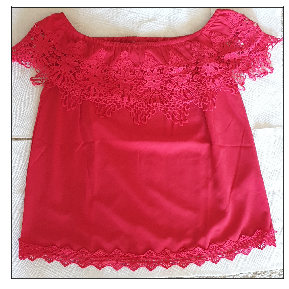

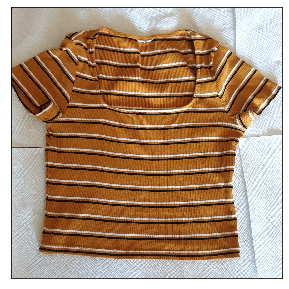

In [50]:
#Reading all remaining Images, to be used for prediction and plotting the images. 

boots=np.array(mpimg.imread("Vis/boots.jpg"))
slipper=np.array(mpimg.imread("Vis/slipper.jpg"))
shoes1=np.array(mpimg.imread("Vis/shoes1.jpg"))
Tshirt=np.array(mpimg.imread("Vis/Tshirt.jpg"))
tshirt1=np.array(mpimg.imread("Vis/tshirt1.jpg"))

fig, ax= plt.subplots(figsize=(5,5))
ax.imshow(boots)
ax.set(xticks=[], yticks=[])
plt.show()

fig, ax= plt.subplots(figsize=(5,5))
ax.imshow(slipper)
ax.set(xticks=[], yticks=[])
plt.show()

fig, ax= plt.subplots(figsize=(5,5))
ax.imshow(shoes1)
ax.set(xticks=[], yticks=[])
plt.show()

fig, ax= plt.subplots(figsize=(5,5))
ax.imshow(Tshirt)
ax.set(xticks=[], yticks=[])
plt.show()

fig, ax= plt.subplots(figsize=(5,5))
ax.imshow(tshirt1)
ax.set(xticks=[], yticks=[])
plt.show()


In [51]:
boots.shape     #shape of an image initially

(1960, 1961, 3)

In [52]:
pip install Pillow 

Note: you may need to restart the kernel to use updated packages.


In [53]:
from PIL import Image
import glob


In [55]:
il=[]      #image list
rl=[]      #resized image list        
#created emplty list, to save the resized images
for filename in glob.glob("./Vis/*.jpg"):
    Vis=Image.open(filename)
    il.append(Vis)

In [56]:
for image in il:
    image.show()
    image=image.resize((28,28))          #reshaping of images into 28*28
    rl.append(image)

In [59]:
#save the resized above image to the new resize folder.
for (i, j) in enumerate (rl):
    j.save('{}{}{}'.format('./Resize/image',i+1,'.jpg'))
    

In [60]:
#Read all resized images:
image1=np.array(mpimg.imread("Resize/image1.jpg"))
image2=np.array(mpimg.imread("Resize/image2.jpg"))
image3=np.array(mpimg.imread("Resize/image3.jpg"))
image4=np.array(mpimg.imread("Resize/image4.jpg"))
image5=np.array(mpimg.imread("Resize/image5.jpg"))

In [61]:
#Converting images into gray scale images. 

from skimage import color
from skimage import io

gi1 = color.rgb2gray(io.imread('Resize/image1.jpg'))
gi2 = color.rgb2gray(io.imread('Resize/image2.jpg'))
gi3 = color.rgb2gray(io.imread('Resize/image3.jpg'))
gi4 = color.rgb2gray(io.imread('Resize/image4.jpg'))
gi5 = color.rgb2gray(io.imread('Resize/image5.jpg'))

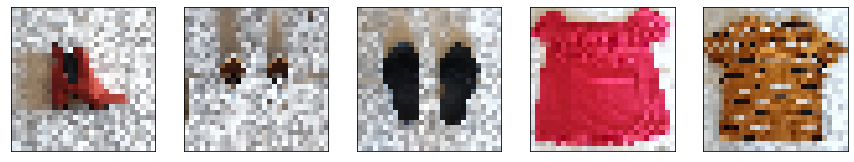

In [62]:
fig, ax=plt.subplots(1,5,figsize=(15,15))
for i, axi in enumerate(ax.flat):
    axi.imshow(rl[i], cmap='binary')
    axi.set(xticks=[],yticks=[])

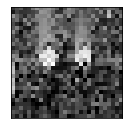

(28, 28)

In [83]:
fig, ax= plt.subplots(figsize=(2,3))
ax.imshow(gi2, cmap='binary')
ax.set(xticks=[], yticks=[])
plt.show()
gi1.shape

In [64]:
#gi1

In [65]:
#if we want to see all the binary images together, we can append the images in the list and visualise
list_image=[]
list_image.append(gi1)
list_image.append(gi2)
list_image.append(gi3)
list_image.append(gi4)
list_image.append(gi5)

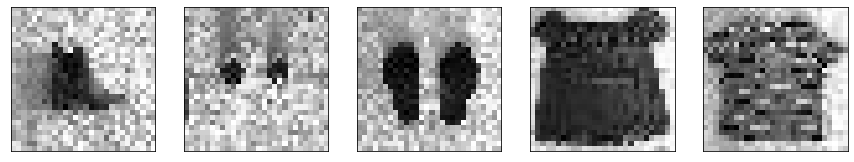

In [66]:
fig, ax=plt.subplots(1,5,figsize=(15,15))
for i, axi in enumerate(ax.flat):
    axi.imshow(list_image[i], cmap='gray')
    axi.set(xticks=[],yticks=[])

In [67]:
len(list_image)

5

In [68]:
#convertung list of images into array.

imagearraynew = np.array(list_image)

In [69]:
imagearraynew.shape    #shape of array

(5, 28, 28)

In [70]:
number_of_columns = imagearraynew[1].shape[0] * imagearraynew[1].shape[1] 
print(number_of_columns)  

784


In [71]:
print(imagearraynew[0].shape)    #shape of 1st element of an array

(28, 28)


In [72]:
#normalizing and reshaping of an array

imagearraynew = imagearraynew.astype('float32')
imagearraynew /= 255.0
print(imagearraynew.shape)

(5, 28, 28)


In [73]:
imagearraynew=imagearraynew.reshape(5,28*28)
print(imagearraynew.shape)

(5, 784)


In [74]:
#Reshaping and displaying shape
newpca = pca.transform(imagearraynew)
newpca.shape

(5, 350)

In [75]:
# Predicting classe_labels of Images using all models defined above:
# Logistic
# Decision Tree
# KNN
# RandomForest
# SVM


In [76]:
#logistic model Prediction
Log_p=logreg_model.predict(newpca)
print(Log_p)

#decision tree prediction
Dec_p=Tree1.predict(newpca)
print(Dec_p)

#knn prediction
k_p=knn_m.predict(newpca)
print(k_p)

#random forest prediction
r_p=random_f.predict(newpca)
print(r_p)

#svm prediction
s_p=svc.predict(newpca)
print(s_p)

[5 5 5 5 5]
[6 6 6 6 6]
[6 6 6 6 6]
[6 6 6 6 6]
[5 5 5 5 5]


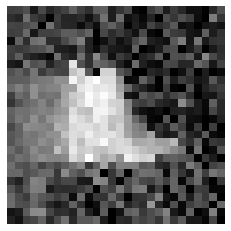

The Predicted class name of the above projected image is: Sandal


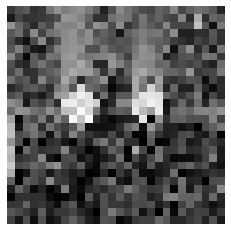

The Predicted class name of the above projected image is: Sandal


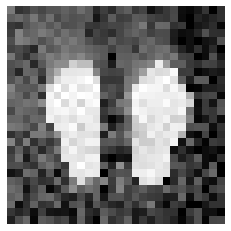

The Predicted class name of the above projected image is: Sandal


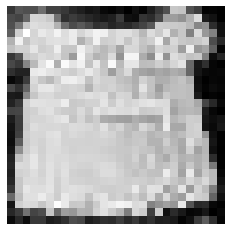

The Predicted class name of the above projected image is: Sandal


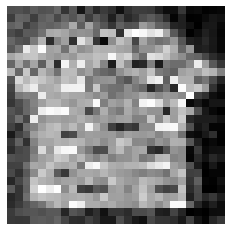

The Predicted class name of the above projected image is: Sandal


In [77]:
#let's see if the predicted names are correct:
#svm
i=0
for i in range(5):                                  #becasuse wehave 8 images:
    a_new=imagearraynew[i]
    a_new_d=a_new.reshape(28,28)
    plt.imshow(a_new_d,cmap='binary')
    plt.axis('off')
    plt.show()
    y_new=s_p[i]   #predicted value
    print("The Predicted class name of the above projected image is:", class_names[y_new])  #class of predicted value as shown above
    i=i+1

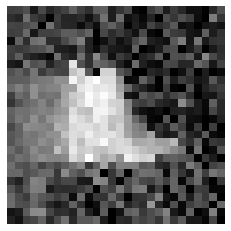

The Predicted class name of the above projected image is: Shirt


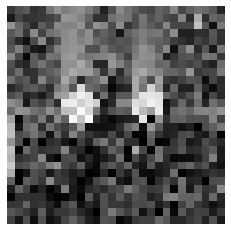

The Predicted class name of the above projected image is: Shirt


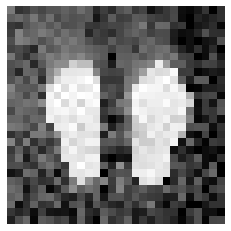

The Predicted class name of the above projected image is: Shirt


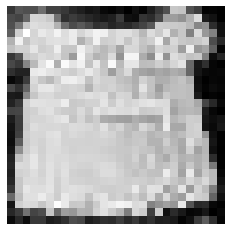

The Predicted class name of the above projected image is: Shirt


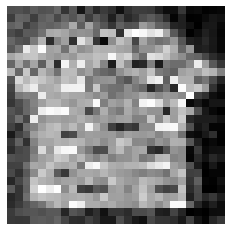

The Predicted class name of the above projected image is: Shirt


In [78]:
# predicting same for decision tree.
i=0
for i in range(5):                                  #becasuse wehave 8 images:
    a_new=imagearraynew[i]
    a_new_d=a_new.reshape(28,28)
    plt.imshow(a_new_d,cmap='binary')
    plt.axis('off')
    plt.show()
    y_new=Dec_p[i]   #predicted value
    print("The Predicted class name of the above projected image is:", class_names[y_new])  #class of predicted value as shown above
    i=i+1

### INTERPRETATION FROM THE ABOVE RESULTS:

#### I imported my own 5 images, resized, grayscaled and reshaped the images, after all the defined steps, used images for prediction of class labels. 

#### As we can see from above prediction, for SVM and Logistic model 3 out of 5 images are predicted correctly.( Counting slipper as sandals only) 
#### For models like Decision Tree, Knn, the prediction for specified image is less than SVM. The model is able to identify 2 images correctly.( Shirt)
### According to above results: SVM or Logistic Regression Model is my best model. 

#### We can improve the prediction power by omproving the quality of images further. 

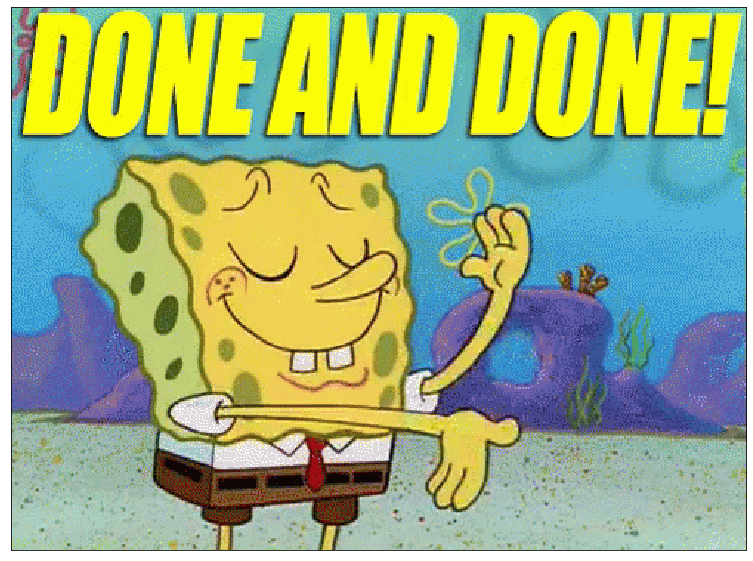

In [81]:
finish=np.array(mpimg.imread("tenorr.gif"))

fig, ax= plt.subplots(figsize=(20,10))
ax.imshow(finish)
ax.set(xticks=[], yticks=[])
plt.show()

Now, it's your turn,

<ul>
    <li><b>Task1:</b> Use the train set to train various supervised models and evaluate their performance using the test set.</li>
    <ul>
        <li>Use different supervised learning models.</li>
        <li>Use different metrics such as <b>accutacy</b>, <b>precision</b>, <b>AUC</b>, and ... in your model evaluation. </li>
        <li>It is not enough to report the metrics. It is crucial that you interpret the metrics for each model and compare them across different models.</li>
        <li> You may need to use the cross validation methods for hyperparameter selection.</li>
        <li> Specify the model that outperforms the other models.</b>
    </ul>
    <li><b>Task2:</b> Use the best model to predict your own fashion pieces.</li>
    <ul>
        <li>Take a picture of five fashion pieces of your own (take pictures in square format).</li>
        <li>Resize images to the correct size (28,28).</li>
        <li>Grayscale your images.</li>
        <li>Visualize all the images side by side</li>
        <li>Use the best model in Task 1 to predict the label of each of your own images.</li>
        <li>How accurate is the final result?</li>
    </ul>
</ul>

### Output

<ul>
    <li>Make sure to put descriptive comments on your code</li>
    <li>Use the markdown cell format in Jupiter to add your own interpretation to the result in each section.</li>
    <li>Make sure to keep the output of your runs when you want to save the final version of the file.</li>
    <li>The final work should be very well structured and should have a consistent flow of analysis.</li>
</ul>

#### Due Date: Nov 9 2020 at 11:59 PM

## Grading Criteria

<table style="width:400px;height:200px;border:1px black solid; background-color:white">
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Comprehensiveness</th>
        <td style="text-align:center;border:1px black solid"><b>30%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Correctness</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Complete Report</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Clear Code</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Innovation (Extra)</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:center;border:1px black solid;color:red"><u>Total</u></th>
        <td style="text-align:center;border:1px black solid;color:red"><b stlyle="color:red">110%</b></td>
    </tr>
</table>